In [10]:

from ultralytics import YOLO
import cv2
import math
import numpy as np
import cvzone  

#cap = cv2.VideoCapture(2)
cap = cv2.VideoCapture(0)
model = YOLO("../yolov8/Yolo-Weights/yolov8m.pt")

classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]

while True:
    success, img = cap.read()
    results = model(img, stream=True)
    for r in results:
        boxes = r.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2 - x1, y2 - y1
            cvzone.cornerRect(img, (x1, y1, w, h))
            conf = math.ceil((box.conf[0] * 100)) / 100
            cls = int(box.cls[0])
            print("Detected class index:", cls)  # Add this line to print detected class index
            if 0 <= cls < len(classNames):  # Check if the class index is within range
                cvzone.putTextRect(img, f'{classNames[cls]} {conf}', (max(0, x1), max(35, y1)), scale=0.7, thickness=1)
            else:
                print("Class index is out of range:", cls)  # Print a message if class index is out of range

    cv2.imshow("Webcam", img)
    if cv2.waitKey(1) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



0: 480x640 (no detections), 1360.4ms
Speed: 95.7ms preprocess, 1360.4ms inference, 14.0ms postprocess per image at shape (1, 3, 480, 640)

Detected class index: 0
Detected class index: 0
0: 480x640 2 persons, 1329.5ms
Speed: 27.9ms preprocess, 1329.5ms inference, 46.9ms postprocess per image at shape (1, 3, 480, 640)

Detected class index: 0
Detected class index: 0
0: 480x640 2 persons, 1165.9ms
Speed: 3.0ms preprocess, 1165.9ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)

Detected class index: 0
Detected class index: 0
0: 480x640 2 persons, 1213.8ms
Speed: 6.0ms preprocess, 1213.8ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

Detected class index: 0
Detected class index: 0
0: 480x640 2 persons, 1260.6ms
Speed: 3.0ms preprocess, 1260.6ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)

Detected class index: 0
0: 480x640 1 person, 1338.4ms
Speed: 3.0ms preprocess, 1338.4ms inference, 7.0ms postprocess per image at shape (1, 3,

KeyboardInterrupt: 

In [7]:
import cv2
from ultralytics import YOLO

model = YOLO("../Yolo-Weights/yolov8s.pt")
results = model("images/pic3.jpg", show=True)
cv2.waitKey(0)



image 1/1 c:\Users\pc\Desktop\PFE\yolo\images\pic3.jpg: 384x640 (no detections), 594.9ms
Speed: 24.6ms preprocess, 594.9ms inference, 16.2ms postprocess per image at shape (1, 3, 384, 640)


In [4]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# Charger le modèle pré-entraîné (ResNet50)
base_model = ResNet50(weights='imagenet', include_top=False)

# Ajouter une nouvelle couche de classification
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)

# Créer le modèle final
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Charger les poids pré-entraînés si nécessaire
# model.load_weights('path_to_weights.h5')

# Charger et prétraiter les images de test
img_path = 'pic/pic3.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Faire la prédiction
preds = model.predict(x)

# Afficher les scores de confiance de chaque classe
print('Predicted scores:', preds)



FileNotFoundError: [Errno 2] No such file or directory: 'pic/pic3.jpg'

Le répertoire de données a été trouvé.
Catégories: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1008s 15s/step - accuracy: 0.5110 - loss: 1.5728 - val_accuracy: 0.1403 - val_loss: 2.0363
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 941s 15s/step - accuracy: 0.6922 - loss: 0.9143 - val_accuracy: 0.0474 - val_loss: 16.6003
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 977s 15s/step - accuracy: 0.7725 - loss: 0.6261 - val_accuracy: 0.0474 - val_loss: 4.5197
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1048s 16s/step - accuracy: 0.8197 - loss: 0.5174 - val_accuracy: 0.2115 - val_loss: 10.1598
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 873s 14s/step - accuracy: 0.8690 - loss: 0.3817 - val_accuracy: 0.0474 - val_loss: 2.8656
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 815s 13s/step - accuracy: 0.9023 - loss: 0.2806 - val_accuracy: 0.2115 - val_loss: 4.6725
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 810s 13s/step - accuracy: 0.9156 - loss: 0.2459 - val_accuracy: 0.1680 - val_l

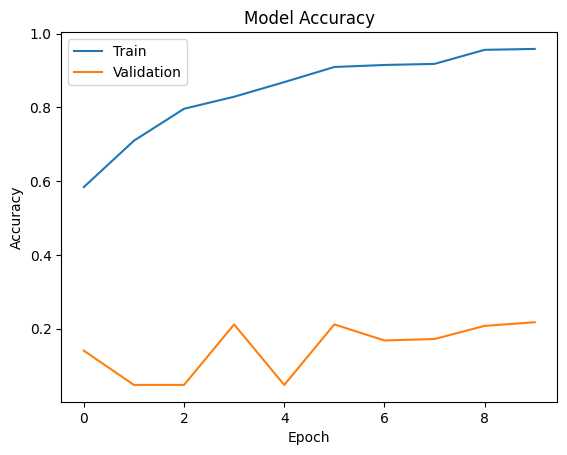

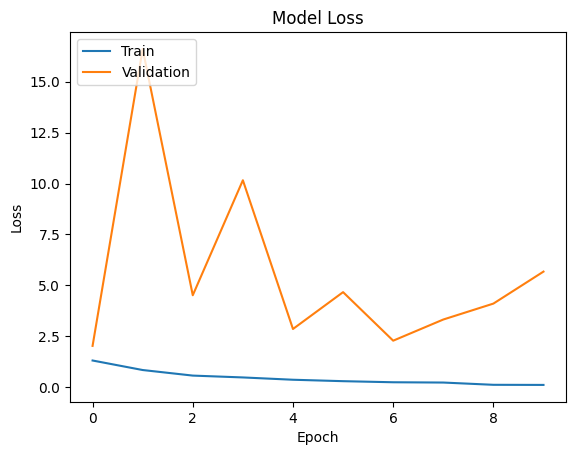

In [6]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Définir le chemin vers le répertoire contenant vos données
data_directory = 'TrashType_Image_Dataset'

# Vérifier si le répertoire de données existe
if not os.path.exists(data_directory):
    print("Le répertoire de données n'existe pas. Veuillez spécifier le chemin correct.")
else:
    print("Le répertoire de données a été trouvé.")
    
    # Obtenir la liste des catégories (sous-répertoires)
    categories = os.listdir(data_directory)
    print("Catégories:", categories)


# des listes vides pour stocker les chemins des fichiers et les étiquettes correspondantes
file_paths = []
labels = []

# Parcourir chaque catégorie de déchets
for category in categories:
    category_directory = os.path.join(data_directory, category)
    category_files = os.listdir(category_directory)
    
    # Ajouter le chemin de chaque fichier et son étiquette correspondante à la liste
    for file in category_files:
        file_paths.append(os.path.join(category_directory, file))
        labels.append(categories.index(category))  # Utiliser l'index de la catégorie comme étiquette

# Convertir les listes en tableaux numpy pour pouvoir les utiliser avec train_test_split
file_paths = np.array(file_paths)
labels = np.array(labels)

# Diviser les données en ensembles d'entraînement et de test (80% pour l'entraînement, 20% pour le test)
train_files, test_files, train_labels, test_labels = train_test_split(file_paths, labels, test_size=0.2, random_state=42)

# Charger et prétraiter les images d'entraînement
train_images = np.array([img_to_array(load_img(file, target_size=(224, 224))) for file in train_files])
train_images /= 255.0 

# Charger et prétraiter les images de test
test_images = np.array([img_to_array(load_img(file, target_size=(224, 224))) for file in test_files])
test_images /= 255.0  # Normalisation des pixels

# Définir le modèle ResNet50 pré-entraîné sans la couche de classification supérieure
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Ajouter une nouvelle couche de classification
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
predictions = tf.keras.layers.Dense(6, activation='softmax')(x)  # 6 classes pour les matériaux

# Créer le modèle final
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Utiliser 'sparse_categorical_crossentropy' car nos étiquettes ne sont pas une one-hot encoding
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Afficher l'accuracy et la perte sur les données d'entraînement et de validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Le répertoire de données a été trouvé.
Catégories: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1228s 17s/step - accuracy: 0.5459 - loss: 1.4370 - val_accuracy: 0.1719 - val_loss: 8792.1484
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 851s 13s/step - accuracy: 0.6630 - loss: 0.9724 - val_accuracy: 0.1719 - val_loss: 2.1701
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 854s 13s/step - accuracy: 0.7321 - loss: 0.8038 - val_accuracy: 0.2115 - val_loss: 2.0330
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 827s 13s/step - accuracy: 0.8238 - loss: 0.4921 - val_accuracy: 0.2332 - val_loss: 6.1523
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 803s 12s/step - accuracy: 0.8374 - loss: 0.4306 - val_accuracy: 0.2332 - val_loss: 4.5665
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 835s 13s/step - accuracy: 0.8718 - loss: 0.3718 - val_accuracy: 0.2134 - val_loss: 5.1808
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 849s 13s/step - accuracy: 0.8584 - loss: 0.3747 - val_accuracy: 0.0474 

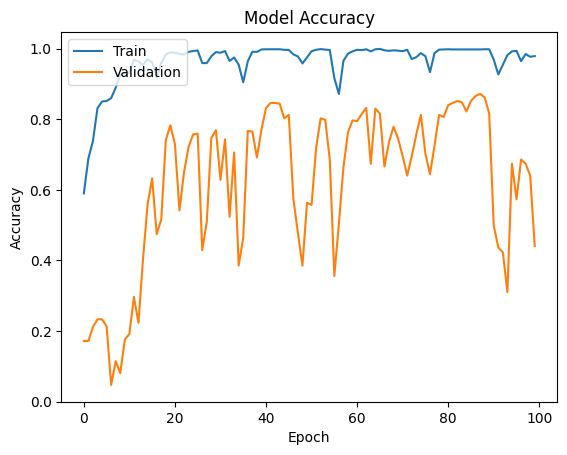

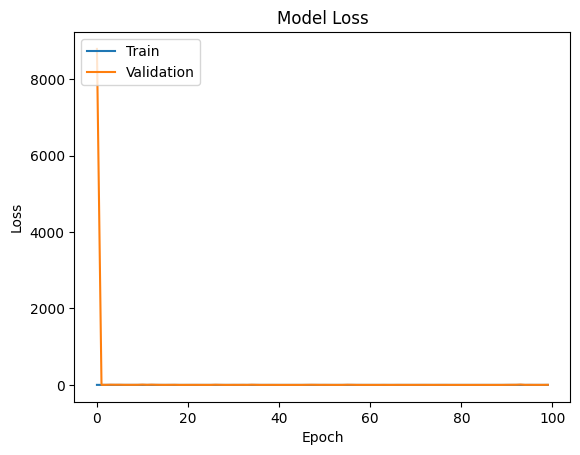

In [7]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Définir le chemin vers le répertoire contenant vos données
data_directory = 'TrashType_Image_Dataset'

# Vérifier si le répertoire de données existe
if not os.path.exists(data_directory):
    print("Le répertoire de données n'existe pas. Veuillez spécifier le chemin correct.")
else:
    print("Le répertoire de données a été trouvé.")
    
    # Obtenir la liste des catégories (sous-répertoires)
    categories = os.listdir(data_directory)
    print("Catégories:", categories)


# des listes vides pour stocker les chemins des fichiers et les étiquettes correspondantes
file_paths = []
labels = []

# Parcourir chaque catégorie de déchets
for category in categories:
    category_directory = os.path.join(data_directory, category)
    category_files = os.listdir(category_directory)
    
    # Ajouter le chemin de chaque fichier et son étiquette correspondante à la liste
    for file in category_files:
        file_paths.append(os.path.join(category_directory, file))
        labels.append(categories.index(category))  # Utiliser l'index de la catégorie comme étiquette

# Convertir les listes en tableaux numpy pour pouvoir les utiliser avec train_test_split
file_paths = np.array(file_paths)
labels = np.array(labels)

# Diviser les données en ensembles d'entraînement et de test (80% pour l'entraînement, 20% pour le test)
train_files, test_files, train_labels, test_labels = train_test_split(file_paths, labels, test_size=0.2, random_state=42)

# Charger et prétraiter les images d'entraînement
train_images = np.array([img_to_array(load_img(file, target_size=(224, 224))) for file in train_files])
train_images /= 255.0 

# Charger et prétraiter les images de test
test_images = np.array([img_to_array(load_img(file, target_size=(224, 224))) for file in test_files])
test_images /= 255.0  # Normalisation des pixels

# Définir le modèle ResNet50 pré-entraîné sans la couche de classification supérieure 
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Ajouter une nouvelle couche de classification
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
predictions = tf.keras.layers.Dense(6, activation='softmax')(x)  # 6 classes pour les matériaux

# Créer le modèle final
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Utiliser 'sparse_categorical_crossentropy' car nos étiquettes ne sont pas une one-hot encoding
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels))

# Afficher l'accuracy et la perte sur les données d'entraînement et de validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')







plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [9]:
from PIL import Image
from torchvision.transforms import *

Le répertoire de données a été trouvé.
Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
Epoch 1/2


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 281s 4s/step - accuracy: 0.2398 - loss: 1.7413 - val_accuracy: 0.2704 - val_loss: 1.6843
Epoch 2/2
64/64 ━━━━━━━━━━━━━━━━━━━━ 274s 4s/step - accuracy: 0.2788 - loss: 1.6781 - val_accuracy: 0.2127 - val_loss: 1.6438


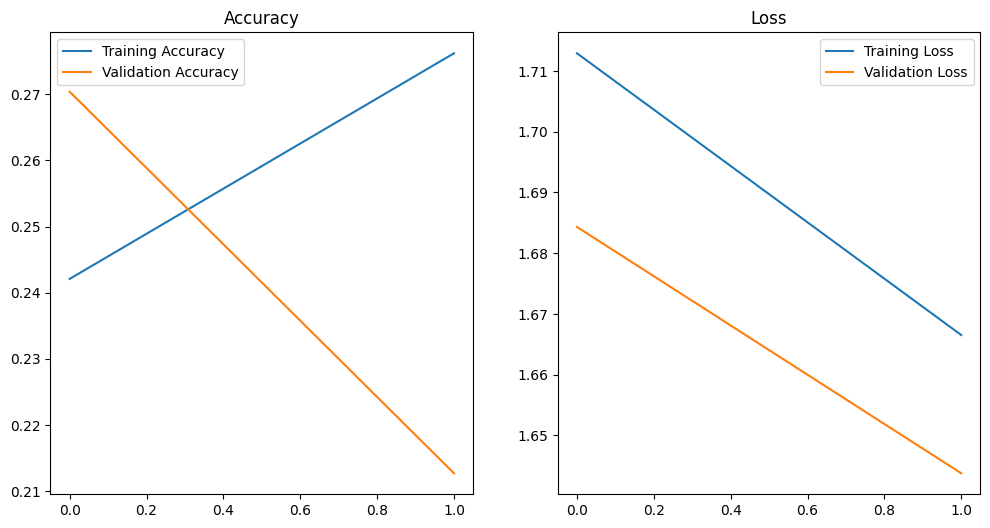

In [16]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Définir le chemin vers le répertoire contenant vos données
data_directory = 'TrashType_Image_Dataset'

# Vérifier si le répertoire de données existe
if not os.path.exists(data_directory):
    print("Le répertoire de données n'existe pas. Veuillez spécifier le chemin correct.")
else:
    print("Le répertoire de données a été trouvé.")

# Charger les données
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Spécifier le fractionnement validation/train ici
)

train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',  # 'sparse' car nous n'utilisons pas de one-hot encoding
    subset='training'  # Définir comme ensemble d'entraînement
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'  # Définir comme ensemble de validation
)

# Construire le modèle
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Geler les couches du modèle de base
for layer in base_model.layers:
    layer.trainable = False

# Ajouter des couches personnalisées
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(6, activation='softmax')  # Ajuster le nombre de classes selon le besoin
])

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(
    train_generator,
    epochs=2,  # Ajuster selon le besoin
    validation_data=validation_generator
)

# Afficher les courbes d'accuracy et de perte
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


Le répertoire de données a été trouvé.
Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 305s 5s/step - accuracy: 0.2413 - loss: 1.7887 - val_accuracy: 0.2644 - val_loss: 1.6835
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 296s 5s/step - accuracy: 0.2580 - loss: 1.6856 - val_accuracy: 0.2604 - val_loss: 1.6589
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 330s 5s/step - accuracy: 0.2958 - loss: 1.6572 - val_accuracy: 0.2346 - val_loss: 1.6796
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 273s 4s/step - accuracy: 0.2934 - loss: 1.6647 - val_accuracy: 0.3101 - val_loss: 1.6363
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 266s 4s/step - accuracy: 0.3092 - loss: 1.6159 - val_accuracy: 0.2903 - val_loss: 1.6389
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 266s 4s/step - accuracy: 0.3060 - loss: 1.6340 - val_accuracy: 0.2763 - val_loss: 1.6292
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 267s 4s/step - accuracy: 0.3068 - loss: 1.6135 - val_accuracy: 0.3320 -

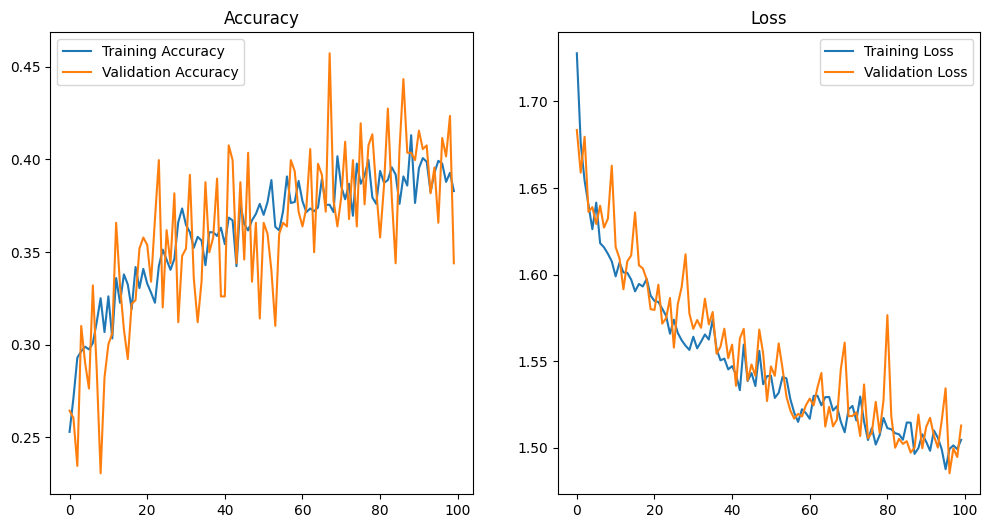

In [23]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Définir le chemin vers le répertoire contenant vos données
data_directory = 'TrashType_Image_Dataset'

# Vérifier si le répertoire de données existe
if not os.path.exists(data_directory):
    print("Le répertoire de données n'existe pas. Veuillez spécifier le chemin correct.")
else:
    print("Le répertoire de données a été trouvé.")

# Charger les données
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Spécifier le fractionnement validation/train ici
)

train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',  # 'sparse' car nous n'utilisons pas de one-hot encoding
    subset='training'  # Définir comme ensemble d'entraînement
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'  # Définir comme ensemble de validation
)

# Construire le modèle
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Geler les couches du modèle de base
for layer in base_model.layers:
    layer.trainable = False

# Ajouter des couches personnalisées
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(6, activation='softmax')  #le nombre de classes
])

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(
    train_generator,
    epochs=100,  
    validation_data=validation_generator
)

# Afficher les courbes d'accuracy et de perte
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


Le répertoire de données a été trouvé.
Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
Epoch 1/2
64/64 ━━━━━━━━━━━━━━━━━━━━ 325s 5s/step - accuracy: 0.2738 - loss: 1.7521 - val_accuracy: 0.2048 - val_loss: 1.8172
Epoch 2/2
64/64 ━━━━━━━━━━━━━━━━━━━━ 337s 5s/step - accuracy: 0.3317 - loss: 1.6436 - val_accuracy: 0.2545 - val_loss: 1.7280


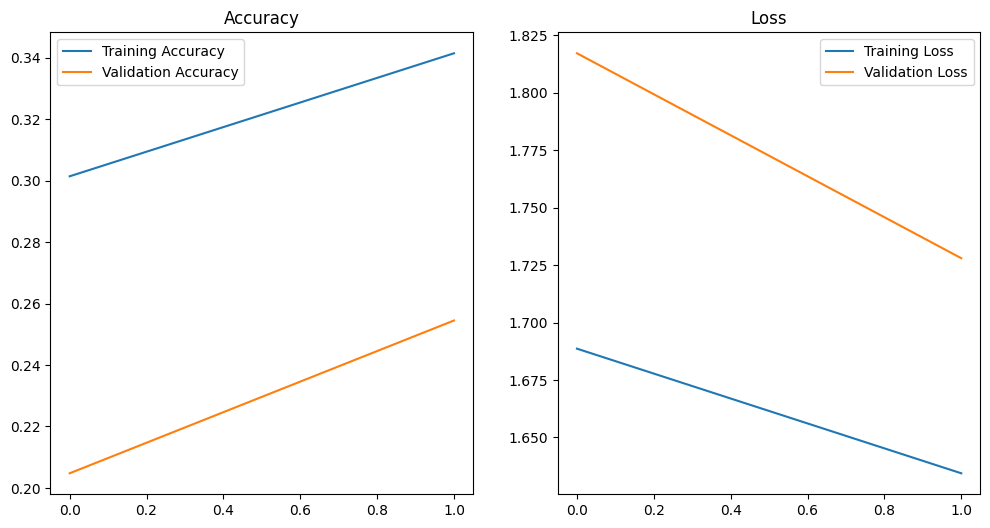

In [24]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Définir le chemin vers le répertoire contenant vos données
data_directory = 'TrashType_Image_Dataset'

# Vérifier si le répertoire de données existe
if not os.path.exists(data_directory):
    print("Le répertoire de données n'existe pas. Veuillez spécifier le chemin correct.")
else:
    print("Le répertoire de données a été trouvé.")

# Charger les données
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Spécifier le fractionnement validation/train ici
)

train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',  # 'sparse' car nous n'utilisons pas de one-hot encoding
    subset='training'  # Définir comme ensemble d'entraînement
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'  # Définir comme ensemble de validation
)

# Construire le modèle
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Geler les couches du modèle de base
for layer in base_model.layers:
    layer.trainable = False

# Ajouter des couches personnalisées
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.BatchNormalization(),  # Ajout de BatchNormalization
    tf.keras.layers.Dropout(0.5),  # Ajout de Dropout
    tf.keras.layers.Dense(6, activation='softmax')  #le nombre de classes
])

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(
    train_generator,
    epochs=2,  
    validation_data=validation_generator
)

# Afficher les courbes d'accuracy et de perte
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [27]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Définir le chemin vers le répertoire contenant vos données
data_directory = 'TrashType_Image_Dataset'

# Vérifier si le répertoire de données existe
if not os.path.exists(data_directory):
    print("Le répertoire de données n'existe pas. Veuillez spécifier le chemin correct.")
else:
    print("Le répertoire de données a été trouvé.")

# Charger les données
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Spécifier le fractionnement validation/train ici
)

train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',  # 'sparse' car nous n'utilisons pas de one-hot encoding
    subset='training'  # Définir comme ensemble d'entraînement
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'  # Définir comme ensemble de validation
)

# Construire le modèle
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Geler les couches du modèle de base
for layer in base_model.layers:
    layer.trainable = False

# Ajouter des couches personnalisées
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.BatchNormalization(),  # Ajout de BatchNormalization
    tf.keras.layers.Dropout(0.5),  # Ajout de Dropout
    tf.keras.layers.Dense(6, activation='softmax')  #le nombre de classes
])

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(
    train_generator,
    epochs=100,  
    validation_data=validation_generator
)

# Afficher les courbes d'accuracy et de perte
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


Le répertoire de données a été trouvé.
Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
Epoch 1/100


KeyboardInterrupt: 

Le répertoire de données a été trouvé.
Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
Epoch 1/100


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 330s 5s/step - accuracy: 0.1687 - loss: 8.6305 - val_accuracy: 0.0537 - val_loss: 14.6926
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 348s 5s/step - accuracy: 0.1312 - loss: 8.4435 - val_accuracy: 0.0537 - val_loss: 11.6528
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 355s 5s/step - accuracy: 0.1137 - loss: 9.6446 - val_accuracy: 0.1909 - val_loss: 7.9725
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 346s 5s/step - accuracy: 0.1282 - loss: 9.4723 - val_accuracy: 0.1909 - val_loss: 5.4556
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 346s 5s/step - accuracy: 0.1178 - loss: 9.4951 - val_accuracy: 0.1909 - val_loss: 1.7918
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 287s 4s/step - accuracy: 0.1347 - loss: 7.0283 - val_accuracy: 0.1590 - val_loss: 1.7918
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - accuracy: 0.1624 - loss: 2.6288 - val_accuracy: 0.1590 - val_loss: 1.7918
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 250s 4s/step - accuracy: 0.1855 - loss: 2.1584 - val_accuracy: 0.1909 - val

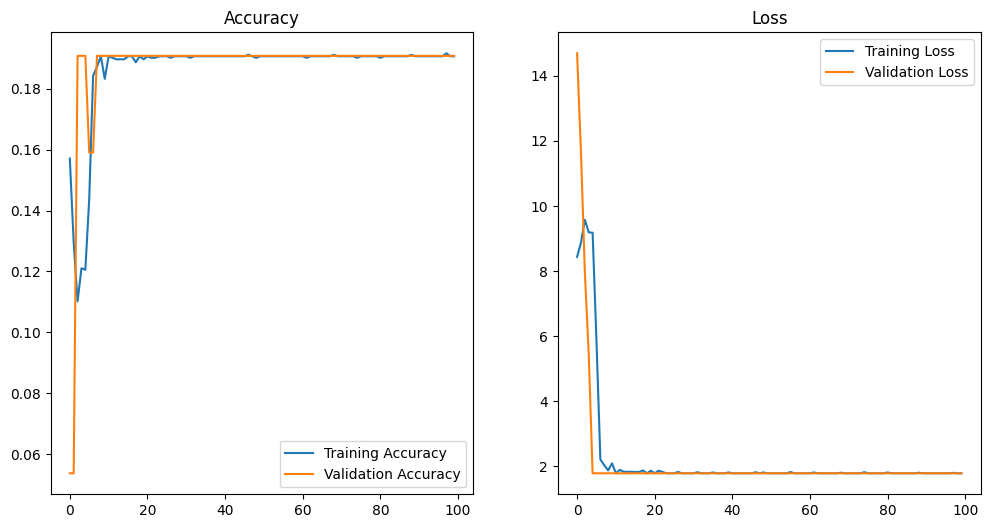

In [33]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Définir le chemin vers le répertoire contenant vos données
data_directory = 'TrashType_Image_Dataset'

# Vérifier si le répertoire de données existe
if not os.path.exists(data_directory):
    print("Le répertoire de données n'existe pas. Veuillez spécifier le chemin correct.")
else:
    print("Le répertoire de données a été trouvé.")

# Charger les données
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Spécifier le fractionnement validation/train ici
)

train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',  # 'sparse' car nous n'utilisons pas de one-hot encoding
    subset='training'  # Définir comme ensemble d'entraînement
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'  # Définir comme ensemble de validation
)

# Construire le modèle
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Geler les couches du modèle de base
for layer in base_model.layers:
    layer.trainable = False

# Ajouter des couches personnalisées
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(6, activation='softmax'),  #le nombre de classes
    tf.keras.layers.Dropout(0.5),  # Ajout de Dropout
    tf.keras.layers.BatchNormalization()  # Ajout de BatchNormalization
])


# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(
    train_generator,
    epochs=100,  
    validation_data=validation_generator
)

# Afficher les courbes d'accuracy et de perte
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


Le répertoire de données a été trouvé.
Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
Epoch 1/100


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 256s 4s/step - accuracy: 0.1472 - loss: 8.9070 - val_accuracy: 0.2048 - val_loss: 6.7591
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 255s 4s/step - accuracy: 0.1688 - loss: 8.2879 - val_accuracy: 0.1988 - val_loss: 10.1321
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 280s 4s/step - accuracy: 0.2069 - loss: 7.9314 - val_accuracy: 0.1988 - val_loss: 10.4869
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 324s 5s/step - accuracy: 0.1565 - loss: 7.0226 - val_accuracy: 0.1590 - val_loss: 1.7918
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 278s 4s/step - accuracy: 0.1850 - loss: 6.3789 - val_accuracy: 0.1590 - val_loss: 1.7918
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 283s 4s/step - accuracy: 0.1866 - loss: 4.9482 - val_accuracy: 0.1590 - val_loss: 1.7918
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.1645 - loss: 3.2792 - val_accuracy: 0.1590 - val_loss: 1.7918
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 265s 4s/step - accuracy: 0.1450 - loss: 2.6638 - val_accuracy: 0.1590 - val

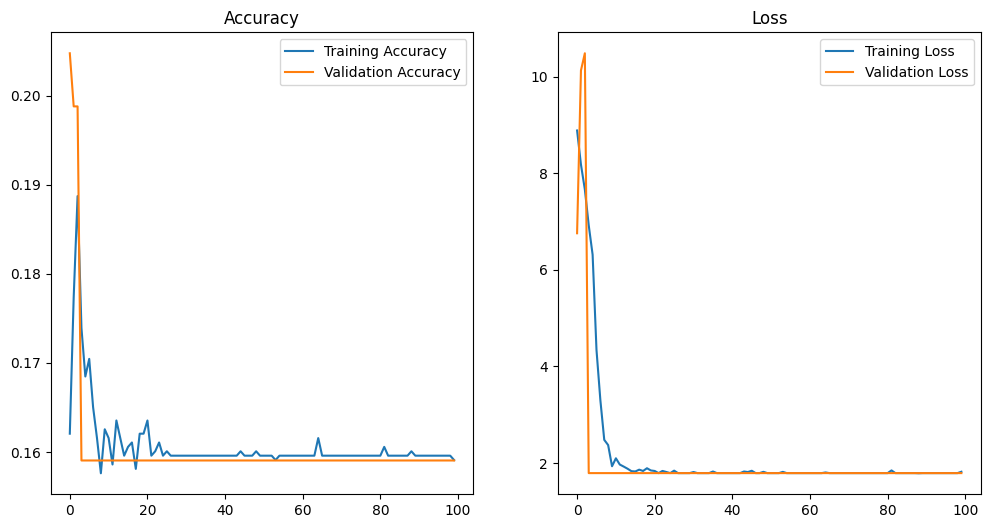

In [10]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Définir le chemin vers le répertoire contenant vos données
data_directory = 'TrashType_Image_Dataset'

# Vérifier si le répertoire de données existe
if not os.path.exists(data_directory):
    print("Le répertoire de données n'existe pas. Veuillez spécifier le chemin correct.")
else:
    print("Le répertoire de données a été trouvé.")

# Charger les données
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Spécifier le fractionnement validation/train 
)

train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',  # 'sparse' car nous n'utilisons pas de one-hot encoding
    subset='training'  # Définir comme ensemble d'entraînement
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'  # Définir comme ensemble de validation
)

# Construire le modèle
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Geler les couches du modèle de base
for layer in base_model.layers:
    layer.trainable = False

# Ajouter des couches personnalisées
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(6, activation='softmax'),  #le nombre de classes
    tf.keras.layers.Dropout(0.5),  # Ajout de Dropout
    tf.keras.layers.BatchNormalization()  # Ajout de BatchNormalization
])


# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(
    train_generator,
    epochs=100,  
    validation_data=validation_generator
)

# Afficher les courbes d'accuracy et de perte
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 260s 4s/step - accuracy: 0.2275 - loss: 2.4531 - val_accuracy: 0.1690 - val_loss: 1.8514
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 256s 4s/step - accuracy: 0.2784 - loss: 2.0264 - val_accuracy: 0.2406 - val_loss: 1.8661
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 259s 4s/step - accuracy: 0.2915 - loss: 1.9681 - val_accuracy: 0.2028 - val_loss: 1.9838
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 246s 4s/step - accuracy: 0.3183 - loss: 1.8287 - val_accuracy: 0.2942 - val_loss: 1.7323
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.3516 - loss: 1.8202 - val_accuracy: 0.2505 - val_loss: 1.8825
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 236s 4s/step - accuracy: 0.3112 - loss: 1.8164 - val_accuracy: 0.3638 - val_loss: 1.6048
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 292s 4s/step - accuracy: 0.3642 - loss: 1.6450 - val_accuracy: 0.4056 - val_loss: 1.5721
Epoch 8/100
64/64 ━━━

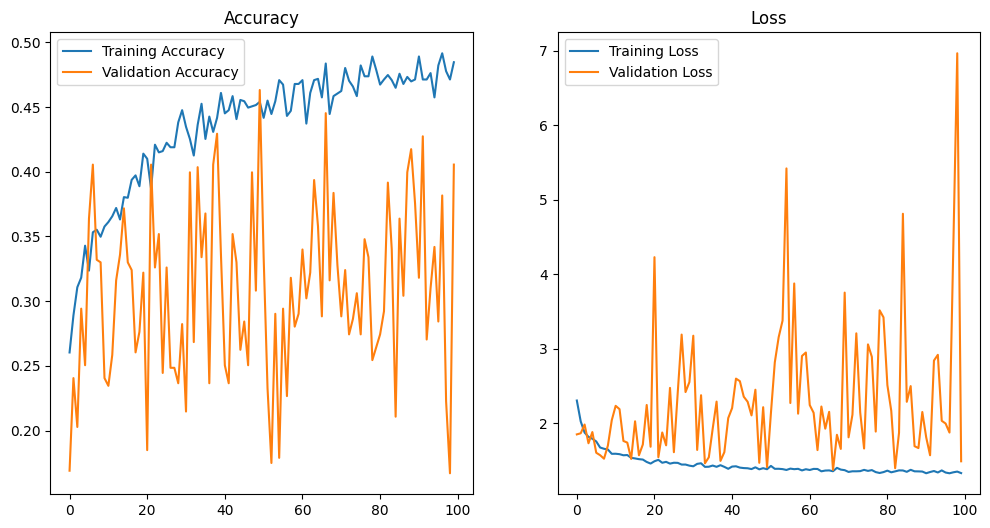

In [11]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Définir le chemin vers le répertoire contenant vos données
data_directory = 'TrashType_Image_Dataset'

# Vérifier si le répertoire de données existe
if not os.path.exists(data_directory):
    print("Le répertoire de données n'existe pas. Veuillez spécifier le chemin correct.")
    exit()

# Charger les données
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Spécifier le fractionnement validation/train ici
)

train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',  # 'sparse' car nous n'utilisons pas de one-hot encoding
    subset='training'  # Définir comme ensemble d'entraînement
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'  # Définir comme ensemble de validation
)

# Construire le modèle
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Geler les couches du modèle de base
for layer in base_model.layers:
    layer.trainable = False

# Ajouter des couches personnalisées
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(
    train_generator,
    epochs=100,  
    validation_data=validation_generator
)

# Afficher les courbes d'accuracy et de perte
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()
